**GOOGLE APP STORE DATA ANALYSIS - By Sathwika Chandra

IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#some additional libraries
import missingno as msno
import plotly.graph_objects as go
import plotly.express as px

LOADING DATA

In [ ]:
#READING DATA FROM APPS
df = pd.read_csv('/content/Google Apps data.csv')

In [ ]:
#QUICK GLANCE AT THE DATA
df

,Unnamed: 0.1,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Minimum Android Ver,Genres
0,0,0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.1,159,19.0,10000,Free,0.0,Others,"January 7, 2018",1.0.0,4.0.3,Art & Design
1,1,1,Coloring book moana,Art And Design,3.9,967,14.0,500000,Free,0.0,Others,"January 15, 2018",2.0.0,4.0.3,Art & Design
2,2,5,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.7,87510,8.7,5000000,Free,0.0,Others,"August 1, 2018",1.2.4,4.0.3,Art & Design
3,3,6,Sketch - Draw & Paint,Art And Design,4.5,215644,25.0,50000000,Free,0.0,Teen,"June 8, 2018",Varies with device,4.2,Art & Design
4,4,7,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967,2.8,100000,Free,0.0,Others,"June 20, 2018",1.1,4.4,Art & Design
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8271,8271,8912,FR Calculator,Family,4.0,7,2.6,500,Free,0.0,Others,"June 18, 2017",1.0.0,4.1,Education
8272,8272,8913,Sya9a Maroc - FR,Family,4.5,38,53.0,5000,Free,0.0,Others,"July 25, 2017",1.48,4.1,Education
8273,8273,8914,Fr. Mike Schmitz Audio Teachings,Family,5.0,4,3.6,100,Free,0.0,Others,"July 6, 2018",1.0,4.1,Education
8274,8274,8915,The SCP Foundation DB fr nn5n,Books And Reference,4.5,114,1.0,1000,Free,0.0,NaN,"January 19, 2015",Varies with device,-1,Books & Reference


In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Minimum Android Ver,Genres
0,0,0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.1,159,19.0,10000,Free,0.0,Others,"January 7, 2018",1.0.0,4.0.3,Art & Design
1,1,1,Coloring book moana,Art And Design,3.9,967,14.0,500000,Free,0.0,Others,"January 15, 2018",2.0.0,4.0.3,Art & Design
2,2,5,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.7,87510,8.7,5000000,Free,0.0,Others,"August 1, 2018",1.2.4,4.0.3,Art & Design
3,3,6,Sketch - Draw & Paint,Art And Design,4.5,215644,25.0,50000000,Free,0.0,Teen,"June 8, 2018",Varies with device,4.2,Art & Design
4,4,7,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967,2.8,100000,Free,0.0,Others,"June 20, 2018",1.1,4.4,Art & Design


In [ ]:
#shape of data
df.shape

(8276, 15)

In [ ]:
#Checking Column Names in the Dataset
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews',
       'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Last Updated',
       'Current Ver', 'Minimum Android Ver', 'Genres'],
      dtype='object')

In [ ]:
df['Category'].unique()

array(['Art And Design', 'Auto And Vehicles', 'Beauty',
       'Books And Reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education', 'Entertainment', 'Events', 'Finance',
       'Food And Drink', 'Health And Fitness', 'House And Home',
       'Libraries And Demo', 'Lifestyle', 'Game', 'Family', 'Medical',
       'Social', 'Shopping', 'Photography', 'Sports', 'Travel And Local',
       'Tools', 'Personalization', 'Productivity', 'Parenting', 'Weather',
       'Video Players', 'News And Magazines', 'Maps And Navigation'],
      dtype=object)

In [ ]:
df['Category'].nunique()

33

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8276 entries, 0 to 8275
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0.1         8276 non-null   int64  
 1   Unnamed: 0           8276 non-null   int64  
 2   App                  8276 non-null   object 
 3   Category             8276 non-null   object 
 4   Rating               8276 non-null   float64
 5   Reviews              8276 non-null   int64  
 6   Size                 8276 non-null   float64
 7   Installs             8276 non-null   int64  
 8   Type                 8276 non-null   object 
 9   Price                8276 non-null   float64
 10  Content Rating       7915 non-null   object 
 11  Last Updated         8276 non-null   object 
 12  Current Ver          8276 non-null   object 
 13  Minimum Android Ver  8276 non-null   object 
 14  Genres               8276 non-null   object 
dtypes: float64(3), int64(4), object(8)
mem

<Axes: >

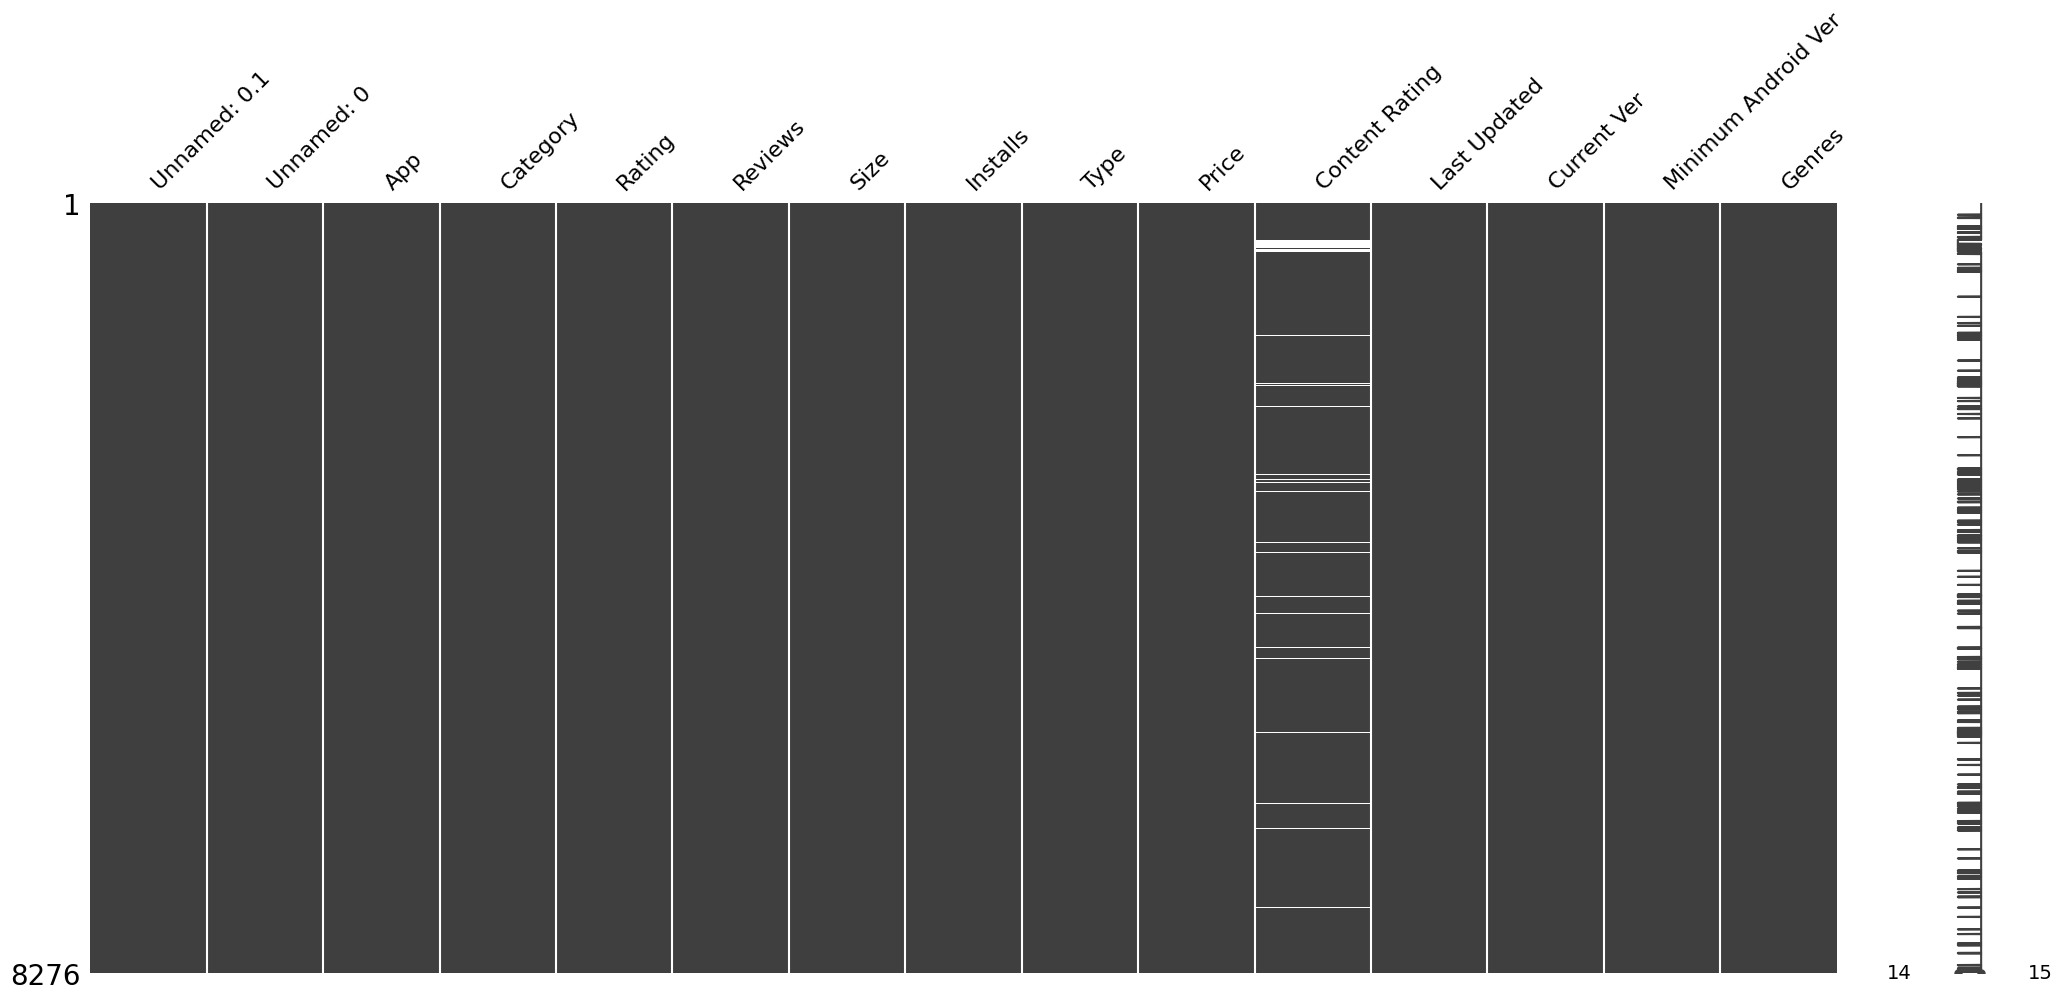

In [ ]:
msno.matrix(df)

In [ ]:
#dropping nans, null entries in the data
df =df.dropna()

<Axes: >

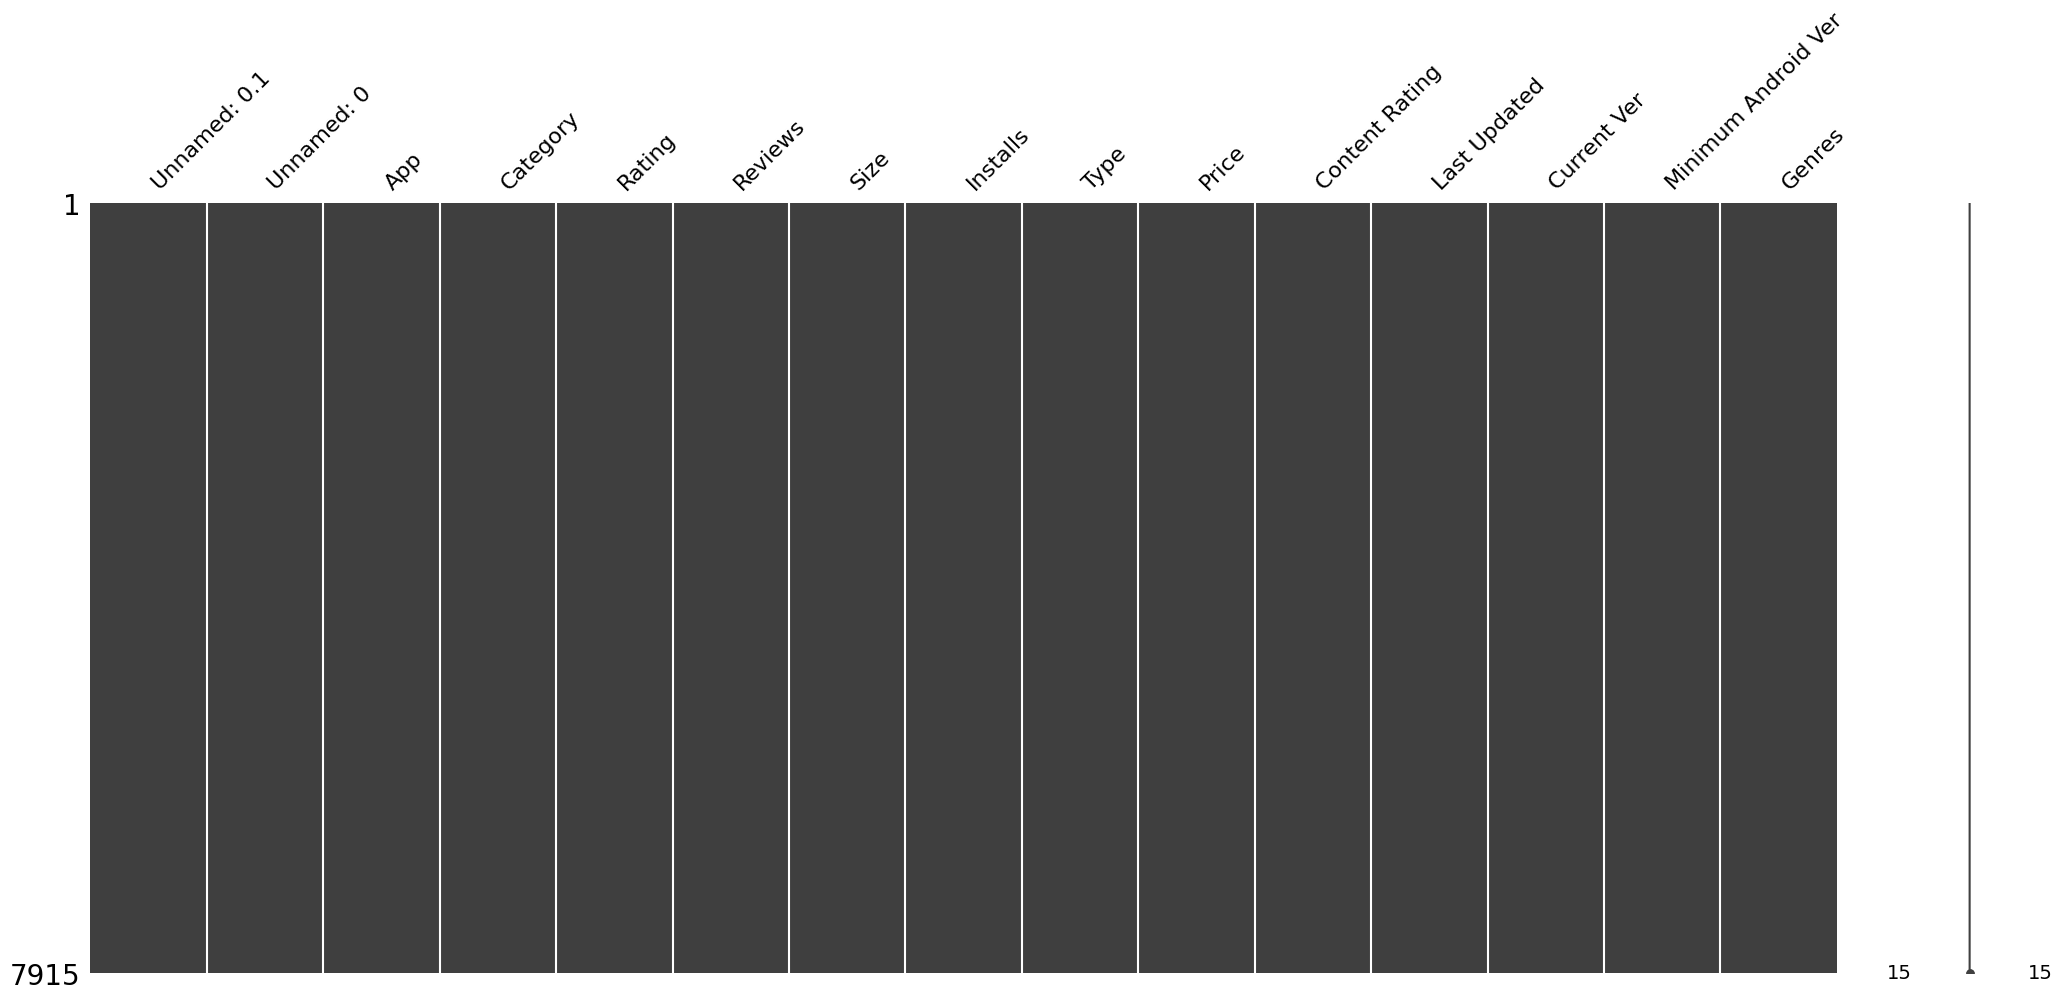

In [ ]:
#no white lines
msno.matrix(df)

In [ ]:
#droping of columns
df.drop(['Unnamed: 0.1','Unnamed: 0'], axis = 1, inplace=True)

<ipython-input-18-44a81415c684>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Unnamed: 0.1','Unnamed: 0'], axis = 1, inplace=True)


In [ ]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Minimum Android Ver,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.1,159,19.00000,10000,Free,0.0,Others,"January 7, 2018",1.0.0,4.0.3,Art & Design
1,Coloring book moana,Art And Design,3.9,967,14.00000,500000,Free,0.0,Others,"January 15, 2018",2.0.0,4.0.3,Art & Design
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.7,87510,8.70000,5000000,Free,0.0,Others,"August 1, 2018",1.2.4,4.0.3,Art & Design
3,Sketch - Draw & Paint,Art And Design,4.5,215644,25.00000,50000000,Free,0.0,Teen,"June 8, 2018",Varies with device,4.2,Art & Design
4,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967,2.80000,100000,Free,0.0,Others,"June 20, 2018",1.1,4.4,Art & Design
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8270,Chemin (fr),Books And Reference,4.8,44,0.60449,1000,Free,0.0,Others,"March 23, 2014",0.8,2.2,Books & Reference
8271,FR Calculator,Family,4.0,7,2.60000,500,Free,0.0,Others,"June 18, 2017",1.0.0,4.1,Education
8272,Sya9a Maroc - FR,Family,4.5,38,53.00000,5000,Free,0.0,Others,"July 25, 2017",1.48,4.1,Education
8273,Fr. Mike Schmitz Audio Teachings,Family,5.0,4,3.60000,100,Free,0.0,Others,"July 6, 2018",1.0,4.1,Education


In [ ]:
df.describe()
#Basic Statistics

,Rating,Reviews,Size,Installs,Price
count,7915.000000,7.915000e+03,7915.000000,7.915000e+03,7915.000000
mean,4.177486,2.821057e+05,18.714311,9.790449e+06,1.063405
std,0.535871,2.133745e+06,22.239824,6.085541e+07,17.149233
min,1.000000,1.000000e+00,0.008300,1.000000e+00,0.000000
25%,4.000000,1.250000e+02,2.700000,1.000000e+04,0.000000
50%,4.300000,3.053000e+03,9.200000,1.000000e+05,0.000000
75%,4.500000,4.546750e+04,26.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [ ]:
#Checking null values
df.isnull().sum()

App                    0
Category               0
Rating                 0
Reviews                0
Size                   0
Installs               0
Type                   0
Price                  0
Content Rating         0
Last Updated           0
Current Ver            0
Minimum Android Ver    0
Genres                 0
dtype: int64

In [ ]:
columns = list(df)
columns

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Last Updated',
 'Current Ver',
 'Minimum Android Ver',
 'Genres']

In [ ]:
(df[columns[1:]]==0).sum()

Category                  0
Rating                    0
Reviews                   0
Size                      0
Installs                  0
Type                      0
Price                  7326
Content Rating            0
Last Updated              0
Current Ver               0
Minimum Android Ver       0
Genres                    0
dtype: int64

In [ ]:
#Replace statement
df[columns[1:]]=df[columns[1:]].replace(0,np.nan)

<ipython-input-24-8e73b16d4fe3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns[1:]]=df[columns[1:]].replace(0,np.nan)


In [ ]:
#before drop statement
df.shape

(7915, 13)

In [ ]:
df.dropna(inplace =True)

<ipython-input-26-bd0d564509cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace =True)


In [ ]:
df.shape

(589, 13)

<ipython-input-28-2ba8b70b70bd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

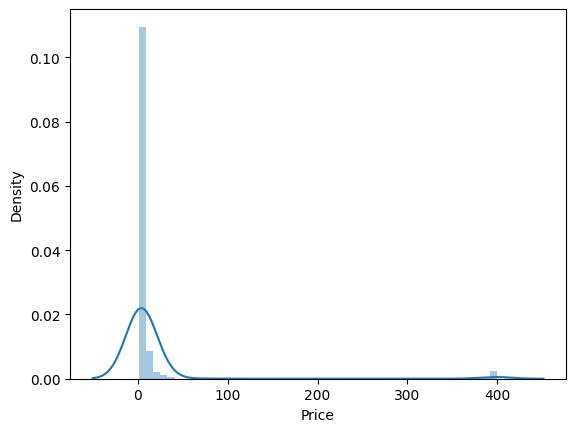

In [ ]:
#Distribution Plot to Identify which technique is used
sns.distplot(df['Price'])

In [ ]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Minimum Android Ver,Genres


In [ ]:
df.duplicated()

221     False
222     False
359     False
395     False
637     False
        ...  
8179    False
8181    False
8222    False
8235    False
8238    False
Length: 589, dtype: bool

In [ ]:
category_series = df['Category'].value_counts().head(10)

In [ ]:
category_series

Family             152
Game                72
Personalization     64
Tools               63
Medical             62
Sports              22
Communication       22
Productivity        17
Lifestyle           16
Photography         15
Name: Category, dtype: int64

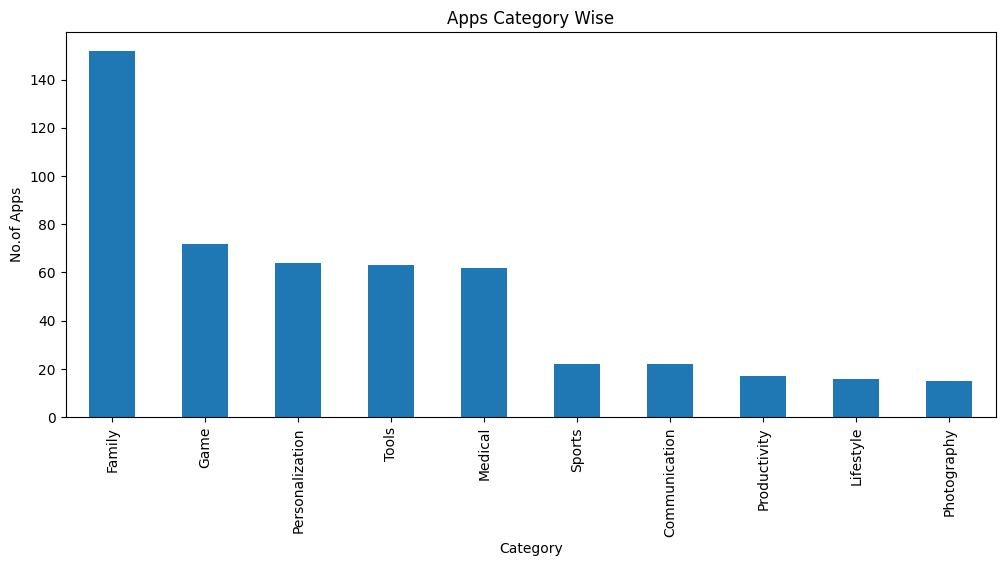

In [ ]:
#Plot Bar Graph for the no.of Apps in each Category
plt.figure(figsize=(12,5))
plt.title("Apps Category Wise")
plt.ylabel('No.of Apps')
plt.xlabel('Category')
plt.xticks(rotation=60,fontsize=10)
df['Category'].value_counts().head(10).plot(kind='bar')
plt.show()

In [ ]:
df = pd.read_csv('/content/Google Apps data.csv')

In [ ]:
#droping of columns
df.drop(['Unnamed: 0.1','Unnamed: 0'], axis = 1, inplace=True)

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Minimum Android Ver,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.1,159,19.0,10000,Free,0.0,Others,"January 7, 2018",1.0.0,4.0.3,Art & Design
1,Coloring book moana,Art And Design,3.9,967,14.0,500000,Free,0.0,Others,"January 15, 2018",2.0.0,4.0.3,Art & Design
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.7,87510,8.7,5000000,Free,0.0,Others,"August 1, 2018",1.2.4,4.0.3,Art & Design
3,Sketch - Draw & Paint,Art And Design,4.5,215644,25.0,50000000,Free,0.0,Teen,"June 8, 2018",Varies with device,4.2,Art & Design
4,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967,2.8,100000,Free,0.0,Others,"June 20, 2018",1.1,4.4,Art & Design


In [ ]:
#Find out how many Apps are Paid and Free
free_or_paid_df=df.groupby('Type')[['App']].count()

In [ ]:
free_or_paid_df

,App
Type,
Free,7672
Paid,604


Text(0.5, 1.0, 'Distribution of Apps based on Paid/Free')

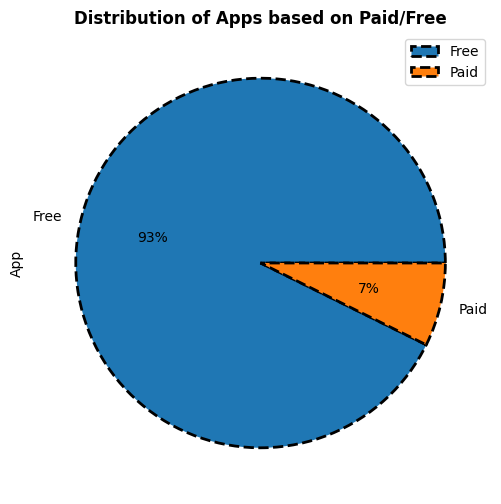

In [ ]:
#Plot pie graph for no.of apps in paid and free Type
free_or_paid_df.plot.pie(subplots=True, figsize=(12, 6), wedgeprops={"edgecolor":"0",'linewidth': 2,
                    'linestyle': 'dashed', 'antialiased': True}, autopct='%1.0f%%')
plt.title('Distribution of Apps based on Paid/Free',fontweight=600)

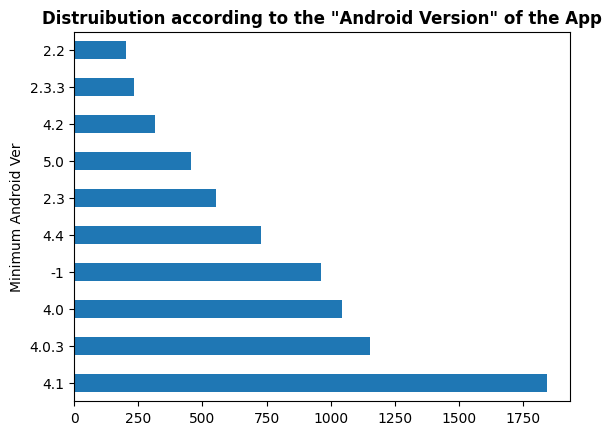

In [ ]:
#* Plot Horizontal bar graph for no. of Apps per each Android Version
plt.title('Distruibution according to the "Android Version" of the App',fontweight=600)
plt.ylabel('Minimum Android Ver')
plt.xlabel('No. of Apps')
df['Minimum Android Ver'].value_counts().head(10).plot(kind='barh')
plt.show()

<Axes: title={'center': 'No. of Apps rated in each Age Group'}, ylabel='Content Rating'>

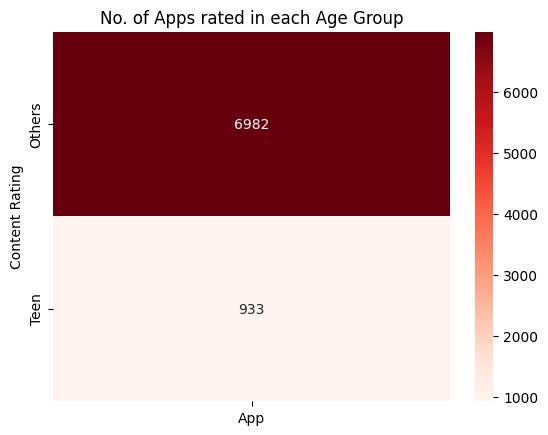

In [ ]:
#* Plot Heatmap for no. of Apps in each age group
plt.title("No. of Apps rated in each Age Group")
sns.heatmap(df.groupby('Content Rating')[['App']].count(),fmt="d", annot=True, cmap='Reds')

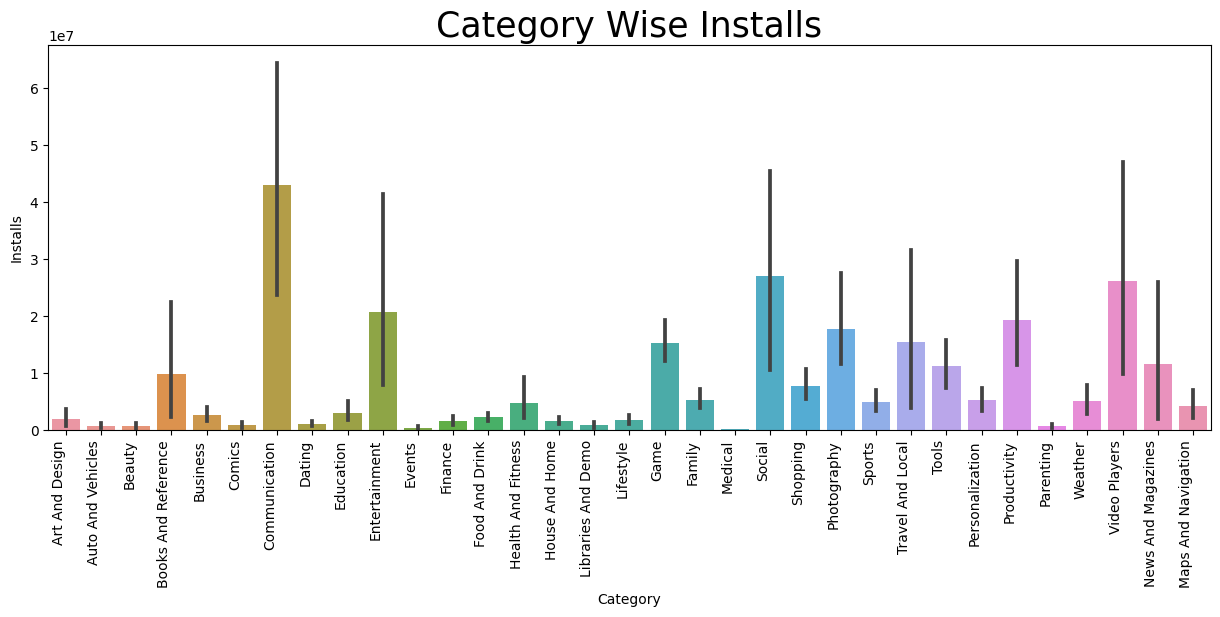

In [ ]:
#Bar Plot Graph for how many Apps installed in each Category
plt.figure(figsize=(15,5))
bar_plot_df = sns.barplot(x=df['Category'], y=df.Installs, data=df)
bar_plot_df.set_xticklabels(bar_plot_df.get_xticklabels(), rotation=90, ha="right")
plt.title('Category Wise Installs',fontsize=25)
plt.show()

In [ ]:
## Asking and Answering Questions
df.sort_values(by=['Reviews'],ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Minimum Android Ver,Genres
1892,Facebook,Social,4.1,78158306,1.0,1000000000,Free,0.0,Teen,"August 3, 2018",Varies with device,-1,Social
287,WhatsApp Messenger,Communication,4.4,69119316,1.0,1000000000,Free,0.0,Others,"August 3, 2018",Varies with device,-1,Communication
1893,Instagram,Social,4.5,66577313,1.0,1000000000,Free,0.0,Teen,"July 31, 2018",Varies with device,-1,Social
286,Messenger – Text and Video Chat for Free,Communication,4.0,56642847,1.0,1000000000,Free,0.0,Others,"August 1, 2018",Varies with device,-1,Communication
1291,Clash of Clans,Game,4.6,44891723,98.0,100000000,Free,0.0,Others,"July 15, 2018",10.322.16,4.1,Strategy
3054,Clash of Clans,Family,4.6,44881447,98.0,100000000,Free,0.0,Others,"July 15, 2018",10.322.16,4.1,Strategy
3072,Clean Master- Space Cleaner & Antivirus,Tools,4.7,42916526,1.0,500000000,Free,0.0,Others,"August 3, 2018",Varies with device,-1,Tools
1275,Subway Surfers,Game,4.5,27722264,76.0,1000000000,Free,0.0,Others,"July 12, 2018",1.90.0,4.1,Arcade
2787,YouTube,Video Players,4.3,25655305,1.0,1000000000,Free,0.0,Teen,"August 2, 2018",Varies with device,-1,Video Players & Editors
5746,"Security Master - Antivirus, VPN, AppLock, Boo...",Tools,4.7,24900999,1.0,500000000,Free,0.0,Others,"August 4, 2018",4.6.6,-1,Tools


In [ ]:
#to find top 10 Apps with highest Rating
df.sort_values(by=['Rating'],ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Minimum Android Ver,Genres
4080,AJ Gray Dark Icon Pack,Personalization,5.0,2,35.0,10,Paid,0.99,Others,"April 29, 2018",1.1,4.1,Personalization
5507,CD CHOICE TUBE,Family,5.0,10,5.8,500,Free,0.00,Others,"July 23, 2017",0.0.4,4.1,Entertainment
7168,EG India,Lifestyle,5.0,3,4.0,100,Free,0.00,Others,"July 29, 2018",1.1.3,4.0.3,Lifestyle
5520,CE Smart,Tools,5.0,3,29.0,100,Free,0.00,Others,"May 28, 2018",2.2.0,4.1,Tools
5526,TI-84 CE Graphing Calculator Manual TI 84,Family,5.0,1,27.0,100,Paid,4.99,Others,"March 28, 2018",1.5.2,4.1,Education
5532,MCQ CE IT,Family,5.0,22,3.6,1000,Free,0.00,Others,"November 7, 2017",2.0,4.4,Education
7188,Eh Bee Wallpapers HD,Personalization,5.0,4,3.9,100,Free,0.00,Others,"April 24, 2018",1.0,4.1,Personalization
6200,cx advance call blocker,Personalization,5.0,3,3.4,50,Free,0.00,Others,"April 9, 2018",1.0,4.0,Personalization
6197,Oración CX,Lifestyle,5.0,103,3.8,5000,Free,0.00,Others,"September 12, 2017",5.1.10,4.1,Lifestyle
7228,NEMA ei,Business,5.0,4,12.0,100,Free,0.00,Others,"November 6, 2017",1.0.4,4.4,Business


In [ ]:
df[df.Rating >= 5.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Minimum Android Ver,Genres
280,Hojiboy Tojiboyev Life Hacks,Comics,5.0,15,37.0,1000,Free,0.0,Others,"June 26, 2018",2.0,4.0.3,Comics
495,American Girls Mobile Numbers,Dating,5.0,5,4.4,1000,Free,0.0,NaN,"July 17, 2018",3.0,4.0.3,Dating
497,Awake Dating,Dating,5.0,2,70.0,100,Free,0.0,NaN,"July 24, 2018",2.2.9,4.4,Dating
503,Spine- The dating app,Dating,5.0,5,9.3,500,Free,0.0,Teen,"July 14, 2018",4.0,4.0.3,Dating
505,Girls Live Talk - Free Text and Video Chat,Dating,5.0,6,5.0,100,Free,0.0,NaN,"August 1, 2018",8.2,4.0.3,Dating
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8194,Mad Dash Fo' Cash,Game,5.0,14,16.0,100,Free,0.0,Others,"June 19, 2017",2.5a,4.1,Arcade
8211,GKPB FP Online Church,Lifestyle,5.0,32,7.9,1000,Free,0.0,Others,"December 31, 2017",0.7.1,4.4,Lifestyle
8229,Monster Ride Pro,Game,5.0,1,24.0,10,Free,0.0,Others,"March 5, 2018",2.0,2.3,Racing
8263,Fr. Daoud Lamei,Family,5.0,22,8.6,1000,Free,0.0,Teen,"June 27, 2018",3.8.0,4.1,Education


In [ ]:
df.sort_values(by=['Installs'],ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Minimum Android Ver,Genres
651,Google Play Games,Entertainment,4.3,7165362,1.0,1000000000,Free,0.0,Teen,"July 16, 2018",Varies with device,-1,Entertainment
2856,Google News,News And Magazines,3.9,877635,13.0,1000000000,Free,0.0,Teen,"August 1, 2018",5.2.0,4.4,News & Magazines
2809,Google Play Movies & TV,Video Players,3.7,906384,1.0,1000000000,Free,0.0,Teen,"August 6, 2018",Varies with device,-1,Video Players & Editors
2787,YouTube,Video Players,4.3,25655305,1.0,1000000000,Free,0.0,Teen,"August 2, 2018",Varies with device,-1,Video Players & Editors
2319,Google Street View,Travel And Local,4.2,2129689,1.0,1000000000,Free,0.0,Others,"August 6, 2018",Varies with device,-1,Travel & Local
2310,Maps - Navigate & Explore,Travel And Local,4.3,9235155,1.0,1000000000,Free,0.0,Others,"July 31, 2018",Varies with device,-1,Travel & Local
144,Google Play Books,Books And Reference,3.9,1433233,1.0,1000000000,Free,0.0,Teen,"August 3, 2018",Varies with device,-1,Books & Reference
1892,Facebook,Social,4.1,78158306,1.0,1000000000,Free,0.0,Teen,"August 3, 2018",Varies with device,-1,Social
1893,Instagram,Social,4.5,66577313,1.0,1000000000,Free,0.0,Teen,"July 31, 2018",Varies with device,-1,Social
1902,Google+,Social,4.2,4831125,1.0,1000000000,Free,0.0,Teen,"July 26, 2018",Varies with device,-1,Social


In [ ]:
pip install squarify

In [ ]:
import matplotlib.pyplot as plt
import squarify
import pandas as pd



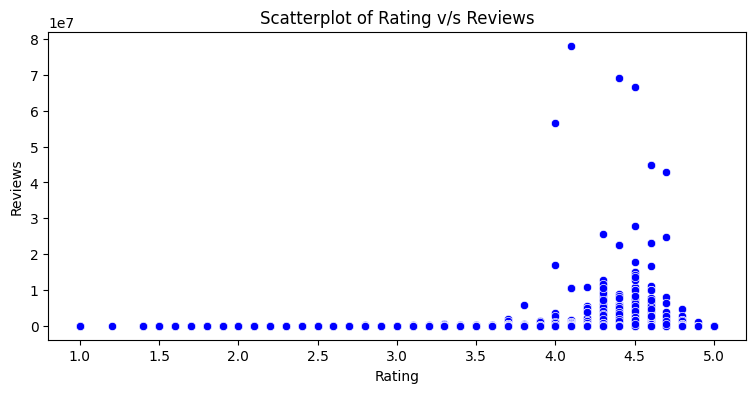

In [ ]:
plt.figure(figsize = (9,4))

Rating=df['Rating']
Reviews=df['Reviews']

sns.scatterplot(x = Rating, y = Reviews, color = 'blue',)

plt.title("Scatterplot of Rating v/s Reviews")
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.show()

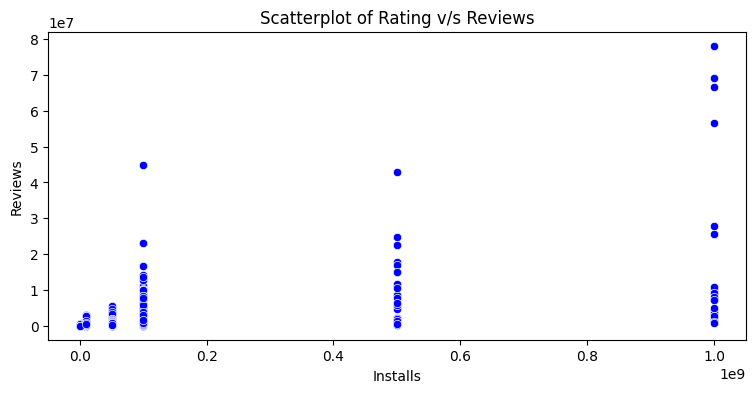

In [ ]:
plt.figure(figsize = (9,4))

Rating=df['Installs']
Reviews=df['Reviews']

sns.scatterplot(x = Rating, y = Reviews, color = 'blue',)

plt.title("Scatterplot of Rating v/s Reviews")
plt.xlabel('Installs')
plt.ylabel('Reviews')
plt.show()

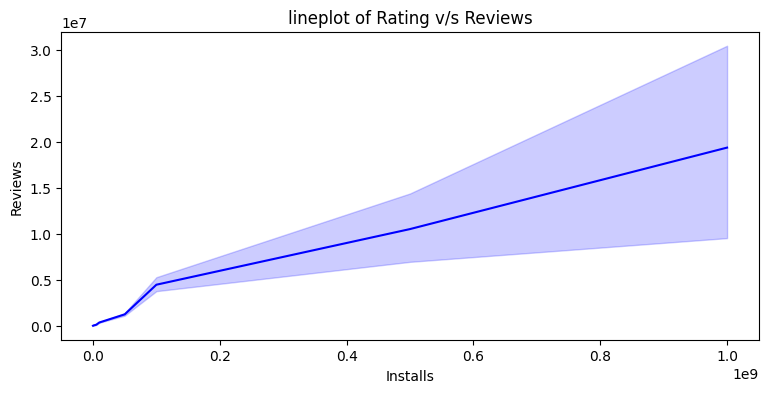

In [ ]:
plt.figure(figsize = (9,4))

Rating=df['Installs']
Reviews=df['Reviews']

sns.lineplot(x = Rating, y = Reviews, color = 'blue',)

plt.title("lineplot of Rating v/s Reviews")
plt.xlabel('Installs')
plt.ylabel('Reviews')
plt.show()

In [ ]:
df['Genres'].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [ ]:
data=df['Genres']
value=data.value_counts()
print(value)

Tools                      717
Entertainment              525
Education                  515
Action                     306
Lifestyle                  302
Finance                    302
Productivity               301
Personalization            296
Medical                    291
Sports                     272
Business                   264
Photography                263
Communication              257
Health & Fitness           247
Casual                     228
Simulation                 207
News & Magazines           204
Social                     203
Travel & Local             187
Arcade                     185
Shopping                   180
Books & Reference          171
Video Players & Editors    153
Dating                     135
Puzzle                     125
Maps & Navigation          118
Role Playing               114
Racing                     103
Strategy                   100
Food & Drink                94
Educational                 93
Adventure                   79
Auto & V

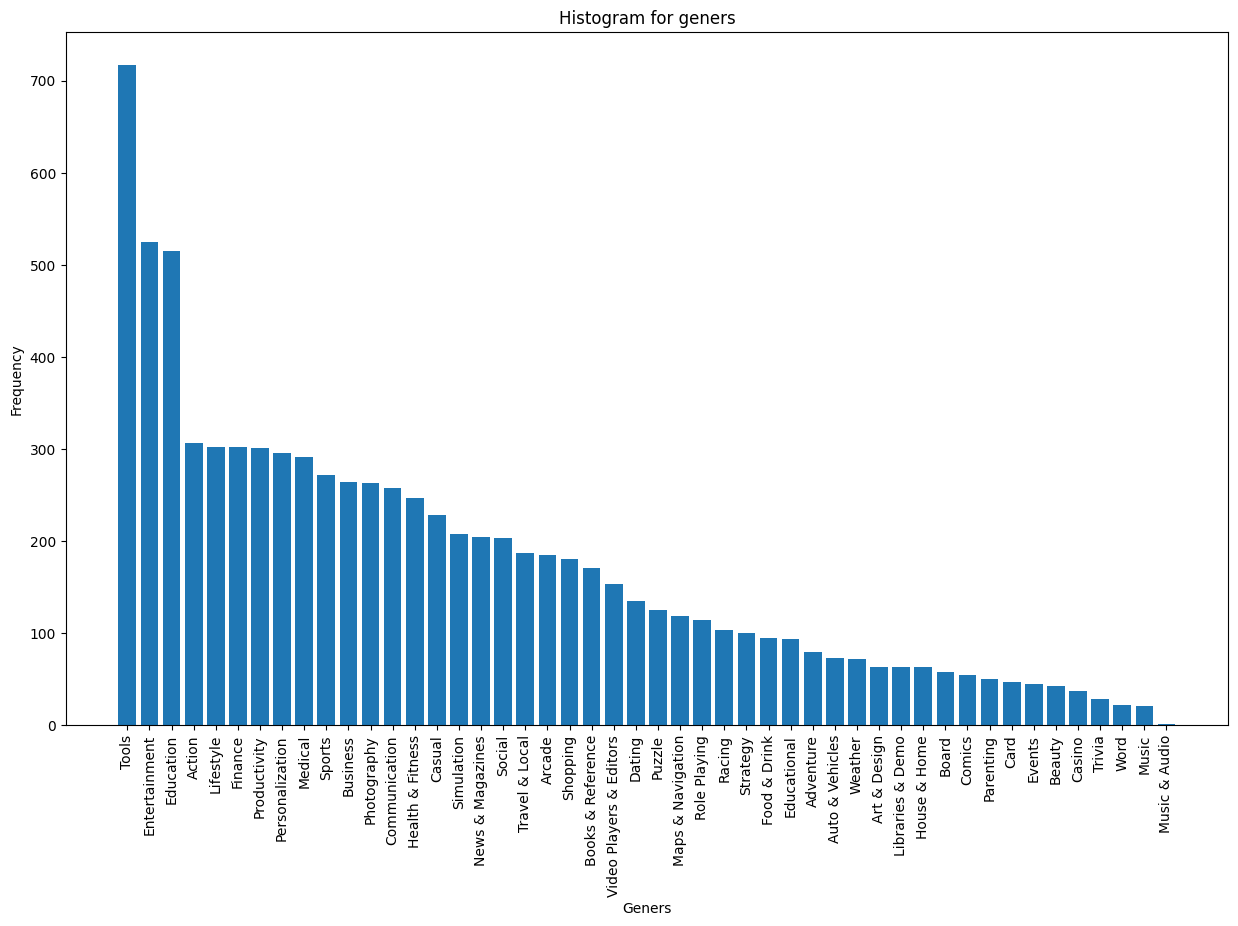

In [ ]:
plt.figure(figsize = (15,9))
plt.bar(value.index, value.values)
plt.xlabel('Geners')
plt.ylabel('Frequency')
plt.title('Histogram for geners')
plt.xticks(rotation=90)
plt.show()


(-1.0999999999015733,
 1.099999999995313,
 -1.0999999999869048,
 1.0999999999983445)

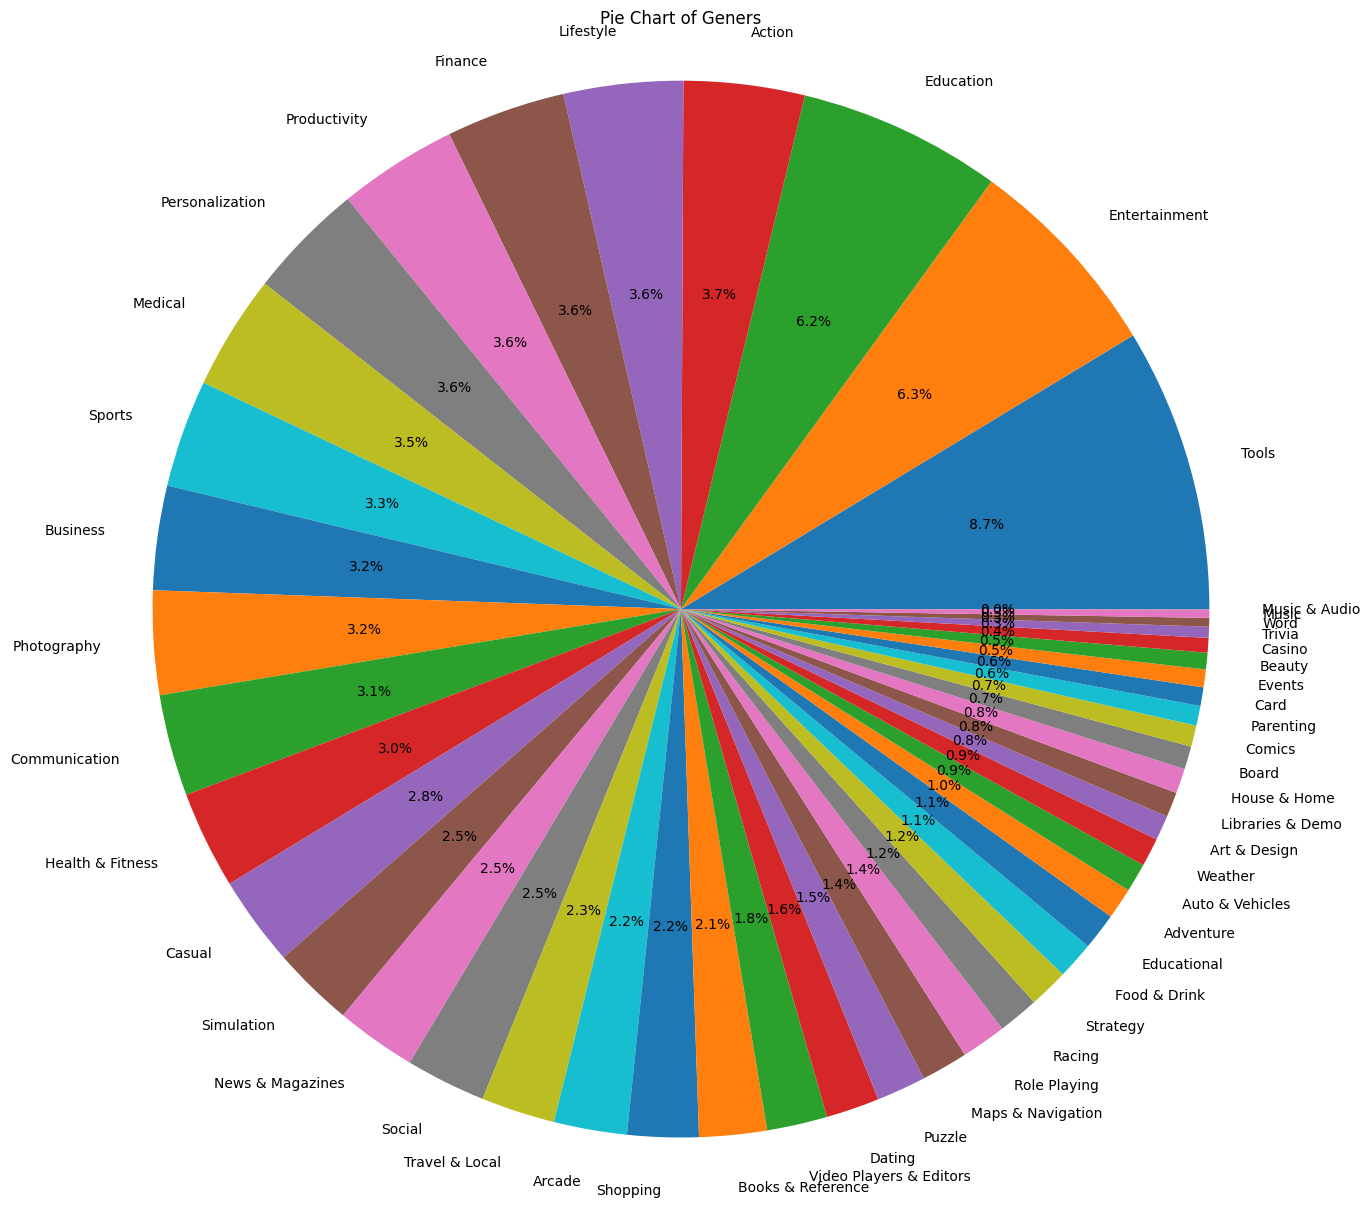

In [ ]:
plt.figure(figsize=(15,15))  # Optional: Set the figure size
plt.pie(value.values, labels=value.index,autopct='%1.1f%%')
plt.title('Pie Chart of Geners')
plt.xticks(rotation=90)
plt.axis('equal')


In [ ]:
df.corr()

<ipython-input-97-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.059430,0.041181,0.042372,-0.021316
Reviews,0.059430,1.000000,0.056789,0.611471,-0.008080
Size,0.041181,0.056789,1.000000,-0.005860,-0.017899
Installs,0.042372,0.611471,-0.005860,1.000000,-0.009859
Price,-0.021316,-0.008080,-0.017899,-0.009859,1.000000


import numpy as np
from google.colab import autoviz
df_7748181556902032560 = autoviz.get_df('df_7748181556902032560')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7748181556902032560, *['Rating'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7748181556902032560 = autoviz.get_df('df_7748181556902032560')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7748181556902032560, *['Reviews'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7748181556902032560 = autoviz.get_df('df_7748181556902032560')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7748181556902032560, *['Size'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7748181556902032560 = autoviz.get_df('df_7748181556902032560')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7748181556902032560, *['Installs'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7748181556902032560 = autoviz.get_df('df_7748181556902032560')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7748181556902032560, *['Rating'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7748181556902032560 = autoviz.get_df('df_7748181556902032560')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7748181556902032560, *['Reviews'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7748181556902032560 = autoviz.get_df('df_7748181556902032560')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7748181556902032560, *['Size'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7748181556902032560 = autoviz.get_df('df_7748181556902032560')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7748181556902032560, *['Installs'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7748181556902032560 = autoviz.get_df('df_7748181556902032560')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_7748181556902032560, *[[['Rating', 'Reviews'], ['Reviews', 'Size'], ['Size', 'Installs'], ['Installs', 'Price']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_7748181556902032560 = autoviz.get_df('df_7748181556902032560')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7748181556902032560, *['Rating'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7748181556902032560 = autoviz.get_df('df_7748181556902032560')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7748181556902032560, *['Reviews'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7748181556902032560 = autoviz.get_df('df_7748181556902032560')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7748181556902032560, *['Size'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7748181556902032560 = autoviz.get_df('df_7748181556902032560')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7748181556902032560, *['Installs'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7748181556902032560 = autoviz.get_df('df_7748181556902032560')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7748181556902032560, *['Rating'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7748181556902032560 = autoviz.get_df('df_7748181556902032560')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7748181556902032560, *['Reviews'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7748181556902032560 = autoviz.get_df('df_7748181556902032560')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7748181556902032560, *['Size'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7748181556902032560 = autoviz.get_df('df_7748181556902032560')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7748181556902032560, *['Installs'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7748181556902032560 = autoviz.get_df('df_7748181556902032560')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_7748181556902032560, *[[['Rating', 'Reviews'], ['Reviews', 'Size'], ['Size', 'Installs'], ['Installs', 'Price']]], **{})
chart

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100')])

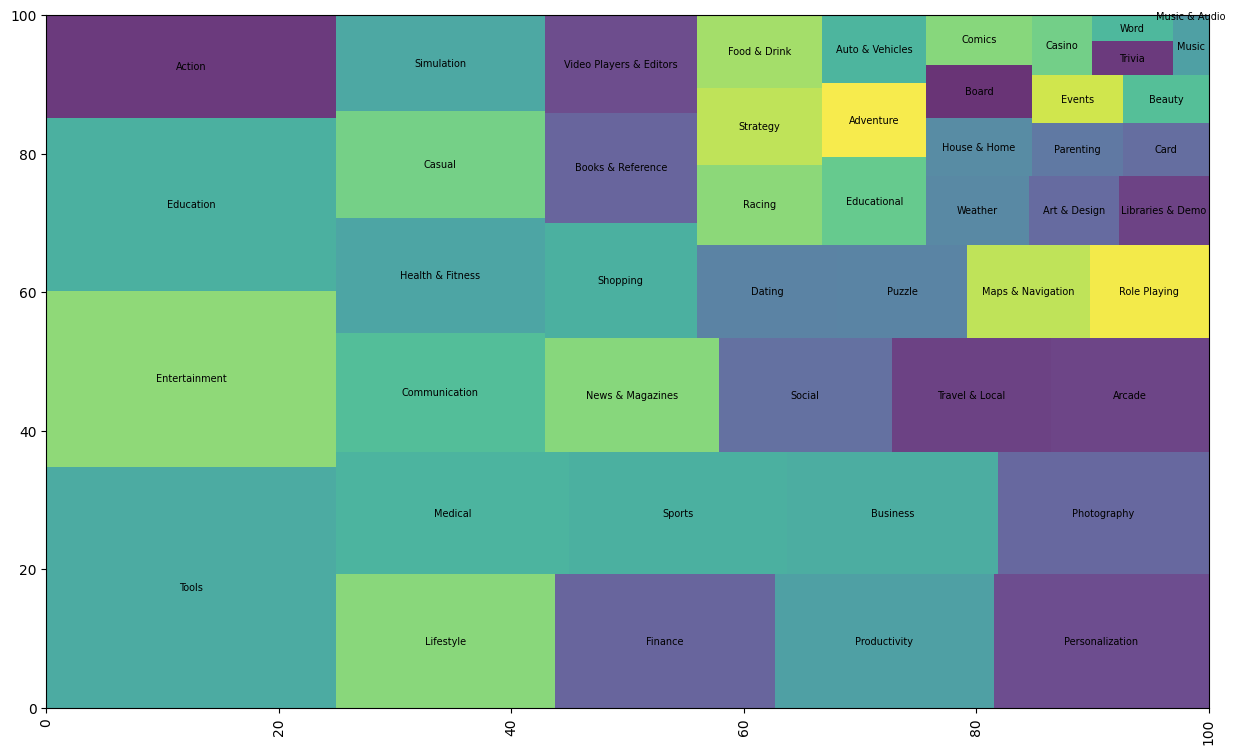

In [ ]:
plt.figure(figsize=(15, 9))
text_kwargs = {'fontsize': 7, 'fontweight': 'ultralight', 'color': 'black'}
squarify.plot(label=value.index, sizes=value.values,alpha=0.8, text_kwargs=text_kwargs)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [Text(0, 0, 'Art & Design'),
  Text(1, 0, 'Auto & Vehicles'),
  Text(2, 0, 'Beauty'),
  Text(3, 0, 'Books & Reference'),
  Text(4, 0, 'Business'),
  Text(5, 0, 'Comics'),
  Text(6, 0, 'Communication'),
  Text(7, 0, 'Dating'),
  Text(8, 0, 'Education'),
  Text(9, 0, 'Entertainment'),
  Text(10, 0, 'Events'),
  Text(11, 0, 'Finance'),
  Text(12, 0, 'Food & Drink'),
  Text(13, 0, 'Health & Fitness'),
  Text(14, 0, 'House & Home'),
  Text(15, 0, 'Libraries & Demo'),
  Text(16, 0, 'Lifestyle'),
  Text(17, 0, 'Adventure'),
  Text(18, 0, 'Arcade'),
  Text(19, 0, 'Casual'),
  Text(20, 0, 'Card'),
  Text(21, 0, 'Action'),
  Text(22, 0, 'Strategy'),
  Text(23, 0, 'Puzzle'),
  Text(24, 0, 'Sports'),
  Text(25, 0, 'Music')

<Figure size 2100x2000 with 0 Axes>

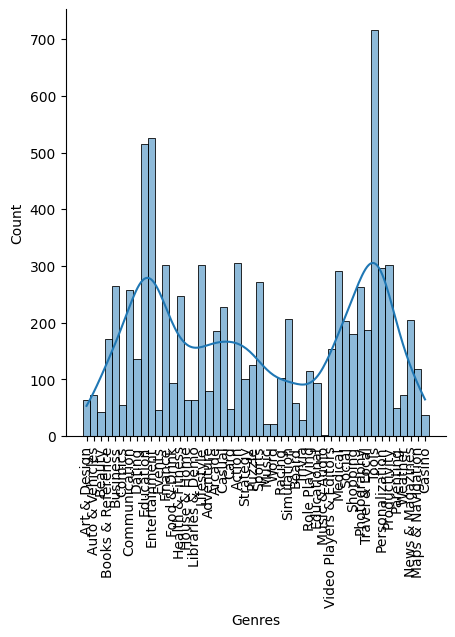

In [ ]:
plt.figure(figsize=(21, 20))
sns.displot(df['Genres'], kde=True, bins=50)
plt.xticks(rotation=90)